In [1]:
import numpy as np
import pandas as pd
import sqlite3
import os
from sklearn.ensemble import RandomForestRegressor

In [2]:
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
from sklearn import model_selection
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [171]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [4]:
planes = pd.read_csv("/home/kodolamacz/bootcamp-2018-03/Pandas/nycflights13_planes.csv.gz", comment="#") #, compression="gzip")
airlines = pd.read_csv("/home/kodolamacz/bootcamp-2018-03/Pandas/nycflights13_airlines.csv.gz", comment="#") #, compression="gzip")
flights = pd.read_csv("/home/kodolamacz/bootcamp-2018-03/Pandas/nycflights13_flights.csv.gz", comment="#") #, compression="gzip")
airports = pd.read_csv("/home/kodolamacz/bootcamp-2018-03/Pandas/nycflights13_airports.csv.gz", comment="#") #, compression="gzip")
weather = pd.read_csv("/home/kodolamacz/bootcamp-2018-03/Pandas/nycflights13_weather.csv.gz", comment="#") #, compression="gzip")

In [5]:
planes.head()

,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
0,N10156,2004.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,NaN,Turbo-fan
1,N102UW,1998.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
2,N103US,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
3,N104UW,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
4,N10575,2002.0,Fixed wing multi engine,EMBRAER,EMB-145LR,2,55,NaN,Turbo-fan


In [6]:
weather.head()

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,0,37.04,21.92,53.97,230.0,10.35702,11.918651,0.0,1013.9,10.0,2013-01-01 01:00:00
1,EWR,2013,1,1,1,37.04,21.92,53.97,230.0,13.80936,15.891535,0.0,1013.0,10.0,2013-01-01 02:00:00
2,EWR,2013,1,1,2,37.94,21.92,52.09,230.0,12.65858,14.567241,0.0,1012.6,10.0,2013-01-01 03:00:00
3,EWR,2013,1,1,3,37.94,23.00,54.51,230.0,13.80936,15.891535,0.0,1012.7,10.0,2013-01-01 04:00:00
4,EWR,2013,1,1,4,37.94,24.08,57.04,240.0,14.96014,17.215830,0.0,1012.8,10.0,2013-01-01 05:00:00


In [7]:
flights.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00


## Tables merge 

In [8]:
fl_pl = pd.merge(flights,planes,on='tailnum',how='left')

In [9]:
flights.shape

(336776, 19)

In [10]:
fl_pl.shape

(336776, 27)

In [11]:
fl_pl.head()

,year_x,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,minute,time_hour,year_y,type,manufacturer,model,engines,seats,speed,engine
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,...,15,2013-01-01 05:00:00,1999.0,Fixed wing multi engine,BOEING,737-824,2.0,149.0,NaN,Turbo-fan
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,...,29,2013-01-01 05:00:00,1998.0,Fixed wing multi engine,BOEING,737-824,2.0,149.0,NaN,Turbo-fan
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,...,40,2013-01-01 05:00:00,1990.0,Fixed wing multi engine,BOEING,757-223,2.0,178.0,NaN,Turbo-fan
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,...,45,2013-01-01 05:00:00,2012.0,Fixed wing multi engine,AIRBUS,A320-232,2.0,200.0,NaN,Turbo-fan
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,...,0,2013-01-01 06:00:00,1991.0,Fixed wing multi engine,BOEING,757-232,2.0,178.0,NaN,Turbo-fan


In [12]:
fl_pl_we = pd.merge(fl_pl,weather,on=['time_hour','origin'],how='left')

In [13]:
fl_pl_we.head()

,year_x,month_x,day_x,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,hour_y,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,...,4.0,37.94,24.08,57.04,240.0,14.96014,17.215830,0.0,1012.8,10.0
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,...,4.0,41.00,23.00,48.39,260.0,18.41248,21.188714,0.0,1012.3,10.0
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,...,4.0,39.02,24.98,56.77,260.0,14.96014,17.215830,0.0,1013.2,10.0
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,...,4.0,39.02,24.98,56.77,260.0,14.96014,17.215830,0.0,1013.2,10.0
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
fl_pl_we.shape

(336776, 40)

## Droping non-numerical columns

In [15]:
fl_pl_we.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336776 entries, 0 to 336775
Data columns (total 40 columns):
year_x            336776 non-null int64
month_x           336776 non-null int64
day_x             336776 non-null int64
dep_time          328521 non-null float64
sched_dep_time    336776 non-null int64
dep_delay         328521 non-null float64
arr_time          328063 non-null float64
sched_arr_time    336776 non-null int64
arr_delay         327346 non-null float64
carrier           336776 non-null object
flight            336776 non-null int64
tailnum           334264 non-null object
origin            336776 non-null object
dest              336776 non-null object
air_time          327346 non-null float64
distance          336776 non-null int64
hour_x            336776 non-null int64
minute            336776 non-null int64
time_hour         336776 non-null object
year_y            278864 non-null float64
type              284170 non-null object
manufacturer      284170 non-nu

In [71]:
to_drop = ["carrier","dest","year_x","month_x","day_x","carrier","year_y","month_y","day_y",
           "hour_y","year","origin","dep_time",'sched_dep_time','sched_arr_time',
          'tailnum','arr_time','manufacturer','speed','hour_x','minute','time_hour',
        'model','flight']
fl_pl_we_r = fl_pl_we.drop(to_drop,axis=1)

In [72]:
fl_pl_we_r.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336776 entries, 0 to 336775
Data columns (total 17 columns):
dep_delay     328521 non-null float64
arr_delay     327346 non-null float64
air_time      327346 non-null float64
distance      336776 non-null int64
type          284170 non-null object
engines       284170 non-null float64
seats         284170 non-null float64
engine        284170 non-null object
temp          335417 non-null float64
dewp          335417 non-null float64
humid         335417 non-null float64
wind_dir      329242 non-null float64
wind_speed    335419 non-null float64
wind_gust     335419 non-null float64
precip        335436 non-null float64
pressure      298447 non-null float64
visib         335436 non-null float64
dtypes: float64(14), int64(1), object(2)
memory usage: 46.2+ MB


In [73]:
fl_pl_we_r.head()

,dep_delay,arr_delay,air_time,distance,type,engines,seats,engine,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,2.0,11.0,227.0,1400,Fixed wing multi engine,2.0,149.0,Turbo-fan,37.94,24.08,57.04,240.0,14.96014,17.215830,0.0,1012.8,10.0
1,4.0,20.0,227.0,1416,Fixed wing multi engine,2.0,149.0,Turbo-fan,41.00,23.00,48.39,260.0,18.41248,21.188714,0.0,1012.3,10.0
2,2.0,33.0,160.0,1089,Fixed wing multi engine,2.0,178.0,Turbo-fan,39.02,24.98,56.77,260.0,14.96014,17.215830,0.0,1013.2,10.0
3,-1.0,-18.0,183.0,1576,Fixed wing multi engine,2.0,200.0,Turbo-fan,39.02,24.98,56.77,260.0,14.96014,17.215830,0.0,1013.2,10.0
4,-6.0,-25.0,116.0,762,Fixed wing multi engine,2.0,178.0,Turbo-fan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Droping nan values

In [74]:
fl_pl_we_r.shape

(336776, 17)

In [75]:
fl_pl_we_r = fl_pl_we_r.dropna(axis=0)

In [76]:
fl_pl_we_r.shape

(243731, 17)

In [77]:
fl_pl_we_r.head()

,dep_delay,arr_delay,air_time,distance,type,engines,seats,engine,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,2.0,11.0,227.0,1400,Fixed wing multi engine,2.0,149.0,Turbo-fan,37.94,24.08,57.04,240.0,14.96014,17.215830,0.0,1012.8,10.0
1,4.0,20.0,227.0,1416,Fixed wing multi engine,2.0,149.0,Turbo-fan,41.00,23.00,48.39,260.0,18.41248,21.188714,0.0,1012.3,10.0
2,2.0,33.0,160.0,1089,Fixed wing multi engine,2.0,178.0,Turbo-fan,39.02,24.98,56.77,260.0,14.96014,17.215830,0.0,1013.2,10.0
3,-1.0,-18.0,183.0,1576,Fixed wing multi engine,2.0,200.0,Turbo-fan,39.02,24.98,56.77,260.0,14.96014,17.215830,0.0,1013.2,10.0
5,-4.0,12.0,150.0,719,Fixed wing multi engine,2.0,191.0,Turbo-fan,37.94,24.08,57.04,240.0,14.96014,17.215830,0.0,1012.8,10.0


In [78]:
fl_pl_we_r.isnull().sum().sum()

0

In [79]:
fl_pl_we_r.head()

,dep_delay,arr_delay,air_time,distance,type,engines,seats,engine,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,2.0,11.0,227.0,1400,Fixed wing multi engine,2.0,149.0,Turbo-fan,37.94,24.08,57.04,240.0,14.96014,17.215830,0.0,1012.8,10.0
1,4.0,20.0,227.0,1416,Fixed wing multi engine,2.0,149.0,Turbo-fan,41.00,23.00,48.39,260.0,18.41248,21.188714,0.0,1012.3,10.0
2,2.0,33.0,160.0,1089,Fixed wing multi engine,2.0,178.0,Turbo-fan,39.02,24.98,56.77,260.0,14.96014,17.215830,0.0,1013.2,10.0
3,-1.0,-18.0,183.0,1576,Fixed wing multi engine,2.0,200.0,Turbo-fan,39.02,24.98,56.77,260.0,14.96014,17.215830,0.0,1013.2,10.0
5,-4.0,12.0,150.0,719,Fixed wing multi engine,2.0,191.0,Turbo-fan,37.94,24.08,57.04,240.0,14.96014,17.215830,0.0,1012.8,10.0


In [80]:
fl_pl_we_r.describe()

,dep_delay,arr_delay,air_time,distance,engines,seats,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
count,243731.000000,243731.000000,243731.000000,243731.000000,243731.000000,243731.000000,243731.000000,243731.000000,243731.000000,243731.000000,243731.000000,243731.000000,243731.000000,243731.000000,243731.000000
mean,11.456450,5.082854,153.768688,1074.906988,1.993981,137.568020,55.003796,40.405980,60.339488,201.181097,10.280555,11.830657,0.001742,1017.995826,9.532265
std,38.073443,42.595934,97.367181,765.324419,0.093925,71.924332,18.000094,19.403448,18.309610,110.792983,9.648803,11.103650,0.014923,7.438412,1.581562
min,-43.000000,-86.000000,20.000000,80.000000,1.000000,2.000000,10.940000,-9.940000,13.000000,0.000000,0.000000,0.000000,0.000000,983.800000,0.000000
25%,-5.000000,-17.000000,83.000000,529.000000,2.000000,55.000000,39.920000,24.980000,46.040000,110.000000,6.904680,7.945768,0.000000,1013.000000,10.000000
50%,-2.000000,-6.000000,131.000000,937.000000,2.000000,149.000000,55.040000,41.000000,59.370000,230.000000,9.206240,10.594357,0.000000,1017.700000,10.000000
75%,9.000000,12.000000,198.000000,1416.000000,2.000000,189.000000,69.980000,57.020000,74.480000,290.000000,13.809360,15.891535,0.000000,1023.100000,10.000000
max,1301.000000,1272.000000,695.000000,4983.000000,4.000000,400.000000,100.040000,78.080000,100.000000,360.000000,1048.360580,1206.432388,0.380000,1042.100000,10.000000


## One hot encoder for string columns

In [81]:
fl_pl_we_r.type.unique()

array(['Fixed wing multi engine', 'Fixed wing single engine', 'Rotorcraft'], dtype=object)

In [82]:
fl_pl_we_r.engine.unique()


array(['Turbo-fan', 'Turbo-jet', 'Reciprocating', 'Turbo-shaft', '4 Cycle',
       'Turbo-prop'], dtype=object)

In [83]:
encoder = OneHotEncoder()

In [84]:
type_cat = fl_pl_we_r.type.astype("category").cat
type_encoded = encoder.fit_transform(type_cat.codes.values.reshape(-1,1))
type_names = type_cat.categories

In [85]:
df_type = pd.DataFrame(type_encoded.toarray())
df_type.columns = type_names

In [86]:
df_type = df_type.drop('Rotorcraft',axis=1)

In [87]:
df_type.head()# drop last column to avoid multicolinearity

,Fixed wing multi engine,Fixed wing single engine
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


In [88]:
engine_cat = fl_pl_we_r.engine.astype("category").cat
engine_encoded = encoder.fit_transform(engine_cat.codes.values.reshape(-1,1))
engine_names = engine_cat.categories

In [89]:
df_engine = pd.DataFrame(engine_encoded.toarray())
df_engine.columns = engine_names

In [90]:
df_engine = df_engine.drop('Turbo-shaft',axis=1)

In [91]:
df_engine.head()

,4 Cycle,Reciprocating,Turbo-fan,Turbo-jet,Turbo-prop
0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0


In [92]:
fl_pl_we_r.shape

(243731, 17)

In [93]:
df_engine.shape

(243731, 5)

In [101]:
fl_pl_we_r = fl_pl_we_r.reset_index()
df_type = df_type.reset_index()
df_engine = df_engine.reset_index()

In [103]:
fl_pl_we_r = pd.concat([fl_pl_we_r, df_type,df_engine], axis=1)

In [111]:
fl_pl_we_r.shape

(243731, 24)

In [105]:
fl_pl_we_r = fl_pl_we_r.drop(['type','engine'],axis=1)

In [109]:
fl_pl_we_r = fl_pl_we_r.drop(['index'],axis=1)

In [112]:
fl_pl_we_r = fl_pl_we_r.drop(['level_0'],axis=1)

In [113]:
fl_pl_we_r.head()

,dep_delay,arr_delay,air_time,distance,engines,seats,temp,dewp,humid,wind_dir,...,precip,pressure,visib,Fixed wing multi engine,Fixed wing single engine,4 Cycle,Reciprocating,Turbo-fan,Turbo-jet,Turbo-prop
0,2.0,11.0,227.0,1400,2.0,149.0,37.94,24.08,57.04,240.0,...,0.0,1012.8,10.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,4.0,20.0,227.0,1416,2.0,149.0,41.00,23.00,48.39,260.0,...,0.0,1012.3,10.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2.0,33.0,160.0,1089,2.0,178.0,39.02,24.98,56.77,260.0,...,0.0,1013.2,10.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-1.0,-18.0,183.0,1576,2.0,200.0,39.02,24.98,56.77,260.0,...,0.0,1013.2,10.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-4.0,12.0,150.0,719,2.0,191.0,37.94,24.08,57.04,240.0,...,0.0,1012.8,10.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [114]:
fl_pl_we_r.isnull().sum().sum()

0

## Adding speed column

In [115]:
fl_pl_we_r["speed"] = fl_pl_we_r["distance"] / fl_pl_we_r["air_time"]

In [116]:
fl_pl_we_r = fl_pl_we_r.drop(["air_time"],axis=1)

## Split on features and response

In [117]:
X = fl_pl_we_r.iloc[:,:-1]

In [118]:
y = fl_pl_we_r.iloc[:,-1]

## Split on train data and test data

In [119]:
X_train,X_test, y_train,y_test = model_selection.train_test_split(X,y,test_size=0.2)

In [122]:
X_train.shape

(194984, 21)

In [121]:
X_test.shape

(48747, 21)

## Linear regression

In [142]:
linmodel = lm.LinearRegression()
kf = model_selection.KFold(n_splits=5,shuffle=True)
cv_results_all = model_selection.cross_val_score(linmodel,X_train,y_train,cv=kf,scoring='r2')
print(cv_results_all)

[ 0.59431869  0.59325375  0.59219518  0.59037073  0.59480574]


## Random forest regression

In [152]:
forest = RandomForestRegressor()
param_grid=[{'n_estimators':[3,5,10],'max_features':[4,6,8]},
            {'bootstrap':[False],'n_estimators':[3,10],'max_features':[4,6,8,10]}]

In [153]:
grid_forest = GridSearchCV(forest,param_grid,cv=kf)
grid_forest.fit(X_train,y_train)
print(grid_forest.best_params_)
print(grid_forest.best_score_)

{'bootstrap': False, 'max_features': 10, 'n_estimators': 10}
0.873697590398


In [154]:
features = rf.feature_importances_

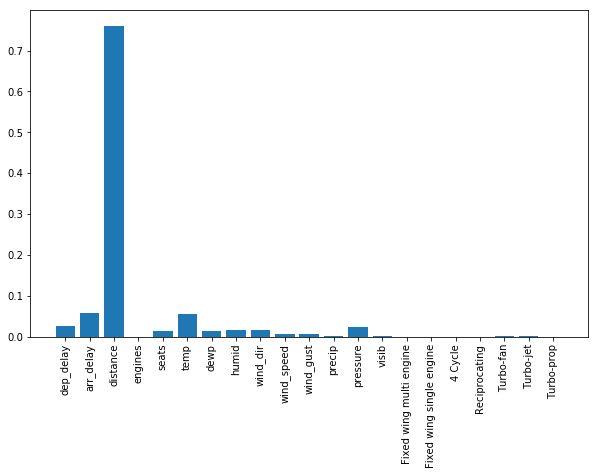

In [155]:
names = X.columns

ticks = [i for i in range(len(names))]

plt.figure(figsize=(10,6));
plt.bar(ticks, rf.feature_importances_)
plt.xticks(ticks, names,rotation='vertical')
plt.show()

In [131]:
sorted_features = sorted(zip(features,X_train.columns),reverse = True)
sorted_features

[(0.76020823825167572, 'distance'),
 (0.058662245437388884, 'arr_delay'),
 (0.056132731157647275, 'temp'),
 (0.025470013177723978, 'dep_delay'),
 (0.023350592231032277, 'pressure'),
 (0.015643657111725561, 'wind_dir'),
 (0.015238130440057918, 'humid'),
 (0.01468754859258572, 'dewp'),
 (0.013001149608744104, 'seats'),
 (0.0063441121144604141, 'wind_speed'),
 (0.0063207605023400046, 'wind_gust'),
 (0.0024768882671359158, 'visib'),
 (0.00094916587717665225, 'precip'),
 (0.00069662146322045128, 'Turbo-fan'),
 (0.0006444394423667151, 'Turbo-jet'),
 (4.7569912231662806e-05, 'engines'),
 (4.3452426847364756e-05, 'Fixed wing multi engine'),
 (4.050124215254448e-05, 'Reciprocating'),
 (3.5849205981176636e-05, 'Fixed wing single engine'),
 (4.4098755818504585e-06, '4 Cycle'),
 (1.9236619237104802e-06, 'Turbo-prop')]

## Choosing 5 best features

In [162]:
columns_5 = [it[1]for it in sorted_features[:5]]
X_train5 = X_train[columns_5]

In [163]:
X_train5.head()

,distance,arr_delay,temp,dep_delay,pressure
58198,1416,-15.0,28.04,-2.0,1021.0
174807,2521,-17.0,75.02,1.0,1024.0
50795,187,-1.0,37.94,-5.0,1027.1
70555,1076,28.0,37.04,-4.0,1003.4
105590,541,25.0,48.02,-3.0,1016.7


## Linear model

In [164]:
cv_results_5 = model_selection.cross_val_score(linmodel,X_train5,y_train,cv=kf,scoring='r2')
cv_results_5

array([ 0.56701942,  0.57277099,  0.56513509,  0.56580749,  0.5698245 ])

## Random forest regression

In [167]:
param_grid2=[{'n_estimators':[3,5,10],'max_features':[2,3,5]},
            {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,5]}]
grid_forest = GridSearchCV(forest,param_grid2,cv=kf)
grid_forest.fit(X_train5,y_train)
print(grid_forest.best_params_)
print(grid_forest.best_score_)

{'max_features': 5, 'n_estimators': 10}
0.854790569496


In [168]:
best_model = grid_forest.best_estimator_

## Check result on test dataset with 5 best features

In [169]:
X_test5 = X_test[columns_5]

In [172]:
print(metrics.r2_score(y_test,best_model.predict(X_test5)))

0.855575010735


In [173]:
print(metrics.explained_variance_score(y_test,best_model.predict(X_test5)))

0.855575080986
